In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#NO MAJOR IMPURITIES
df = pd.read_csv("USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
#EDA - Undertstand the dataset - Exploratory Data Analytics
#Perform preprocessing - Including what we see today..

In [4]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [ ]:
#1. VIF - Analysis 
#2. Model fitting works with - Stages - SKLEARN

In [5]:
df = df.drop(columns = 'Address')

In [6]:
X = df.drop(columns = ['Price'])

In [7]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
vif_df = pd.DataFrame()
vif_df['features'] = X.columns

vif_df['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [ ]:
X.values

In [12]:
variance_inflation_factor?

In [11]:
vif_df

,features,VIF
0,Avg. Area Income,29.650899
1,Avg. Area House Age,27.447775
2,Avg. Area Number of Rooms,45.257291
3,Avg. Area Number of Bedrooms,14.537873
4,Area Population,12.825450


In [14]:
X = df.drop(columns = ['Price','Avg. Area Number of Rooms'])

In [15]:
vif_df = pd.DataFrame()
vif_df['features'] = X.columns

vif_df['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [17]:
variance_inflation_factor?

In [16]:
vif_df

,features,VIF
0,Avg. Area Income,25.439000
1,Avg. Area House Age,23.985721
2,Avg. Area Number of Bedrooms,10.329442
3,Area Population,12.164700


In [ ]:
#Ratio = Avg. Area Income Avg. / Area Number of Bedrooms	 

In [18]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test  = train_test_split(X,df['Price'], test_size = 0.25, shuffle = True)

In [40]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Bedrooms,Area Population
327,61252.637672,5.189911,4.43,40890.266029
4994,73060.846226,5.293682,4.16,22695.695480
399,70619.166966,5.890269,5.15,37865.648548
3043,46646.710541,6.331878,3.45,34006.865298
3688,78929.781546,6.231375,6.18,39667.863192
...,...,...,...,...
2549,68527.541309,5.651894,4.38,34977.451911
981,55481.286744,5.733547,3.46,42179.670042
1709,63015.687464,5.797959,3.39,26673.881886
917,63759.050701,6.135727,6.23,35071.995994


In [ ]:
#Model - Is intelligent - It knows how to learn 
#Studies 
#Fit all data - Evaluate on the same  - 90%
#take data - Train - Fit on this data 
#Evaluation on #Test- Algorithm will never see for traning 
  #Questions: questions alone - Whole syllabus?
  #IDEAL - 70% of total dataset - TRAIN - 30% of the total dataset - TEST - Train and Test Tradeoff # 75-25
  #80- 20 : 90 - 10 

In [41]:
## Model iniitalization 
model = LinearRegression() #Parameters will have model specific defenition - Algorithm 

In [43]:
## MOdel Fitting 
model.fit(X_train, y_train)

LinearRegression()

In [44]:
model.coef_

array([2.14404124e+01, 1.63396202e+05, 4.75545786e+04, 1.53932387e+01])

In [45]:
model.intercept_

-1959310.2429563883

In [46]:
y_predicted_train = model.predict(X_train)

In [47]:
y_predicted_Test = model.predict(X_test)

In [48]:
print("The train MSE is:",mean_squared_error(y_train,y_predicted_train))
print("The test MSSE is:",mean_squared_error(y_test,y_predicted_Test))

The train MSSE is: 22194276259.28202
The test MSSE is: 20568701119.464825


In [49]:
print("The train RMSSE is:",np.sqrt(mean_squared_error(y_train,y_predicted_train)))
print("The test RMSSE is:",np.sqrt(mean_squared_error(y_test,y_predicted_Test)))

The train RMSSE is: 148977.43540309055
The test RMSSE is: 143417.92467981408


In [52]:
r2_score(y_train,y_predicted_train)

0.8227463621809497

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

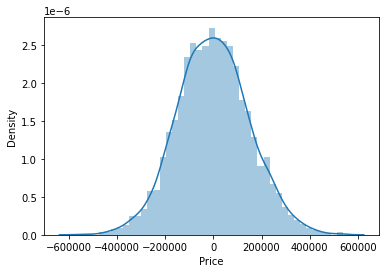

In [55]:
Deviations = y_train - y_predicted_train 
sns.distplot(Deviations)